In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_CRO = df[df['job_country'] == 'Croatia']

In [3]:
df_skills = df_CRO.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
1669,Junior Data Analyst (m/f),sql
1669,Junior Data Analyst (m/f),r
1669,Junior Data Analyst (m/f),python
1669,Junior Data Analyst (m/f),tableau
1669,Junior Data Analyst (m/f),excel
...,...,...
771864,Data Engineer,bigquery
771864,Data Engineer,airflow
771864,Data Engineer,sap
771864,Data Engineer,looker


In [6]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
370,sql,Data Engineer,75
289,python,Data Engineer,74
369,sql,Data Analyst,46
17,aws,Data Engineer,41
290,python,Data Scientist,30
...,...,...,...
136,github,Machine Learning Engineer,1
134,github,Data Analyst,1
133,github,Cloud Engineer,1
132,github,Business Analyst,1


In [16]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

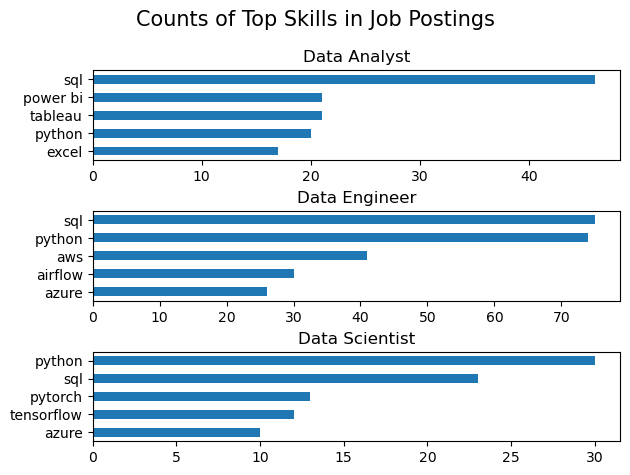

In [23]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()
    

In [28]:
df_job_title_count = df_CRO['job_title_short'].value_counts().reset_index(name='jobs_total')

In [29]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short' )

df_skills_perc['skill_perc'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,sql,Data Engineer,75,107,70.093458
1,python,Data Engineer,74,107,69.158879
2,sql,Data Analyst,46,69,66.666667
3,aws,Data Engineer,41,107,38.317757
4,python,Data Scientist,30,42,71.428571
...,...,...,...,...,...
421,github,Machine Learning Engineer,1,22,4.545455
422,github,Data Analyst,1,69,1.449275
423,github,Cloud Engineer,1,5,20.000000
424,github,Business Analyst,1,36,2.777778


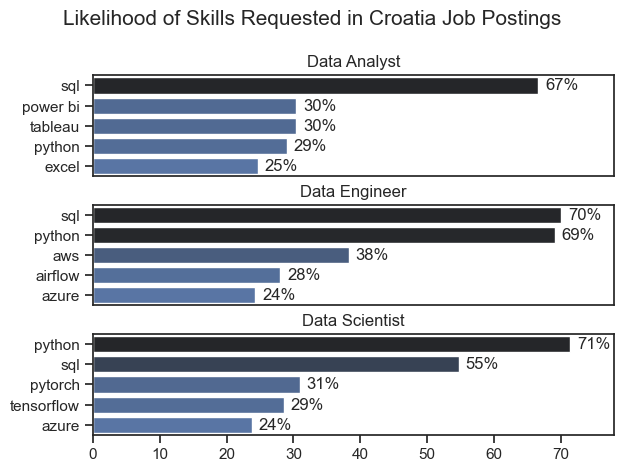

In [35]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_perc', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot['skill_perc']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in Croatia Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()